In [552]:
import numpy as np
import matplotlib.pyplot as plt

In [553]:
# from numba import jit
import numpy as np
import matplotlib.pyplot as plt
# @jit(nopython=True)
def make_Bijk(N):
    Bijk = np.ones((N,N,N)) - np.eye(N)
    for i in range(N): Bijk[i,i,:]=0;Bijk[i,:,i]=0
    return Bijk

In [554]:
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

In [555]:
def Kuramoto_SOL_CHIMERA(Theta,t,omega,Bijk,K,N):
    # print("Case m = 0")
    theta = Theta.copy()
    # theta_i,theta_j = np.meshgrid(theta,theta,sparse=False,indexing='ij')
    i,j,k = np.meshgrid(theta,theta,theta,sparse=False,indexing='ij')
    # theta_i,theta_j = np.meshgrid(theta,theta,sparse=True)
    dtheta = omega + np.sum(np.sum(K*Bijk*np.sin(j+k-2*i),axis=2),axis=1)/N/N
    return dtheta

def get_order_parameter(theta):
    ''' get theta and return r and theta'''
    rpsi = np.mean(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    return r,psi

def get_Z(theta):
    ''' get theta and return r and theta'''
    Z = np.mean(np.exp(1j*theta))
    return Z

def get_Z12(theta):
    ''' get theta and return r and theta'''
    E1 = np.exp(1j*theta)
    E2 = E1**2
    Z1,Z2 = np.mean(E1),np.mean(E2)
    return Z1,Z2

def get_ZE12(Etheta):
    ''' get theta and return r and theta'''
    E1 = Etheta
    E2 = E1**2
    Z1,Z2 = np.mean(E1),np.mean(E2)
    return Z1,Z2


def get_order_parameter(theta):
    ''' get theta and return r and theta'''
    rpsi = np.mean(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    return r,psi


def Kuramoto_MF_CHIMERA(Theta,t,omega,K):
    # print("Case m = 0")
    theta = Theta.copy()
    r,psi = get_order_parameter(theta)
    dtheta  = omega + K*r*r*np.sin(2*(psi-theta))
    return dtheta

In [556]:
t = np.arange(0,300,0.1)
omega =  1

N = 10
Bijk = make_Bijk(N)
# Bijk2 = make_BIJK2(nu=nu,mu=mu,xi=xi,SS =SS,Nt = 2*N)
Theta = np.random.uniform(0,2*np.pi,N)
K = 2

In [9]:
sol = RK4(Kuramoto_SOL_CHIMERA,Theta,t,args=(omega,Bijk,K,N))
rabs2_1 = np.mean(np.exp(2*sol[:].T*1j),axis=0)
rabs2_2 = np.mean(np.exp(2*sol[:].T*1j),axis=0)
rabs1_1 = np.mean(np.exp(sol[:].T*1j),axis=0)
rabs1_2 = np.mean(np.exp(sol[:].T*1j),axis=0)

# rabs2_ = rabs2__[len(t)//2:]
r2_1 = np.abs(rabs2_1)
r2_2 = np.abs(rabs2_2)

r1_1 = np.abs(rabs1_1)
r1_2 = np.abs(rabs1_2)

NameError: name 'Theta' is not defined

In [ ]:
plt.plot(r2_1)
plt.plot(r1_1)

In [ ]:
# Kuramoto_MF_CHIMERA(Theta,t,N1,omega,K111,K112,K122,beta):
t1 = np.arange(0,3000,0.1)

sol_MF = RK4(Kuramoto_MF_CHIMERA,Theta,t1,args=(omega,K))
# sol_MF = RK4(Kuramoto_MF_HO,Theta,t1,args=(N1,omega,K2,beta))
rabs2_1_MF = np.mean(np.exp(2*sol_MF[:].T*1j),axis=0)
rabs2_2_MF = np.mean(np.exp(2*sol_MF[:].T*1j),axis=0)
rabs1_1_MF = np.mean(np.exp(sol_MF[:].T*1j),axis=0)
rabs1_2_MF = np.mean(np.exp(sol_MF[:].T*1j),axis=0)

# rabs2_ = rabs2__[len(t)//2:]
r2_1_MF = np.abs(rabs2_1_MF)
r2_2_MF = np.abs(rabs2_2_MF)
r1_1_MF = np.abs(rabs1_1_MF)
r1_2_MF = np.abs(rabs1_2_MF)



In [ ]:
plt.plot(r2_1_MF)
plt.plot(r1_1_MF)

# USING XGI

In [557]:
from itertools import permutations,combinations

import xgi


def adjacency_tensor(H, order):
    N = H.num_nodes
    shape = tuple([N] * (order + 1))
    tensor = np.zeros(shape)

    edges = H.edges.filterby("order", order)
    for id, members in edges.members(dtype=dict).items():
        for idcs in permutations(members):
            tensor[idcs] = 1

    return tensor

In [558]:
import time

import hypernetx as hnx
import pandas as pd

import xgi

In [559]:
hyperedges = [[1, 2, 3], [3, 4], [4, 5, 6, 7]]
H = xgi.Hypergraph(hyperedges)

In [560]:
H.add_node(8)
H.add_edge([7, 8])
H.add_nodes_from([9, 10])
H.add_edges_from([[1, 10], [8, 9, 10]])

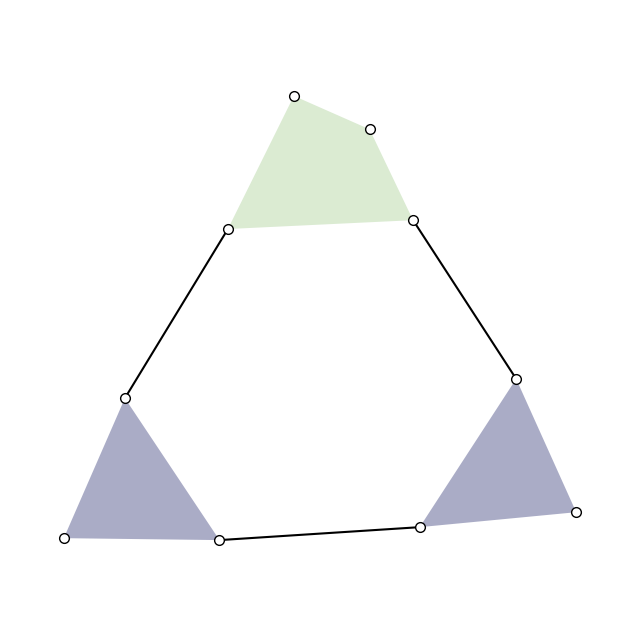

In [561]:
xgi.draw(H);

In [562]:
import numpy as np
import xgi
n = 9
H = xgi.random_hypergraph(n, [0.05, 0.001], seed=None)
omega = 2*np.ones(n)
theta = np.linspace(0, 2*np.pi, n)
theta_time, times = xgi.dynamics.simulate_kuramoto(H, k2=2, k3=3, omega=omega, theta=theta)


In [563]:
import xgi
H = xgi.Hypergraph()
indexing =  []
n = 10
for i,edge in enumerate(combinations(np.arange(n),3)):
    H.add_edge(edge)
    indexing.append(edge)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x30c255a50>,
  <matplotlib.collections.PatchCollection at 0x30c42e7d0>))

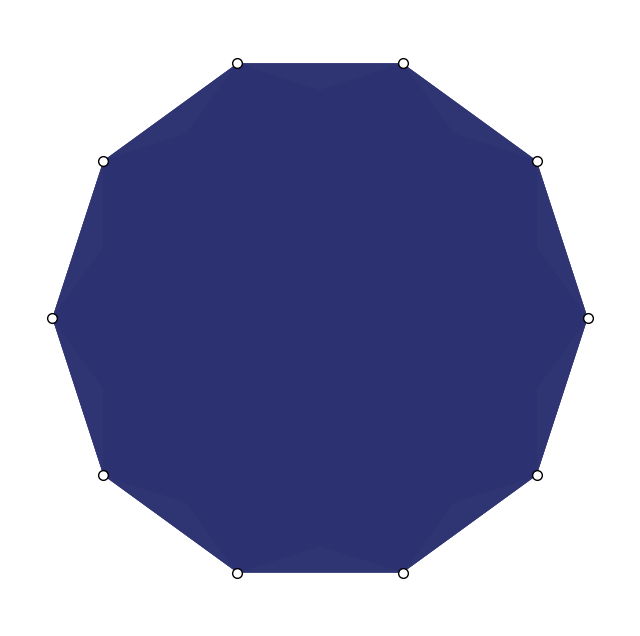

In [564]:
pos = xgi.drawing.layout.circular_layout(H)
xgi.draw(H,pos=pos)

In [565]:
n = 10
omega = 0*np.ones(n)
theta = np.linspace(0, 2*np.pi, n)
theta_time, times = xgi.dynamics.simulate_kuramoto(H, k2=0, k3=2, omega=omega, theta=theta)

In [30]:
r = xgi.dynamics.compute_kuramoto_order_parameter(theta_time)

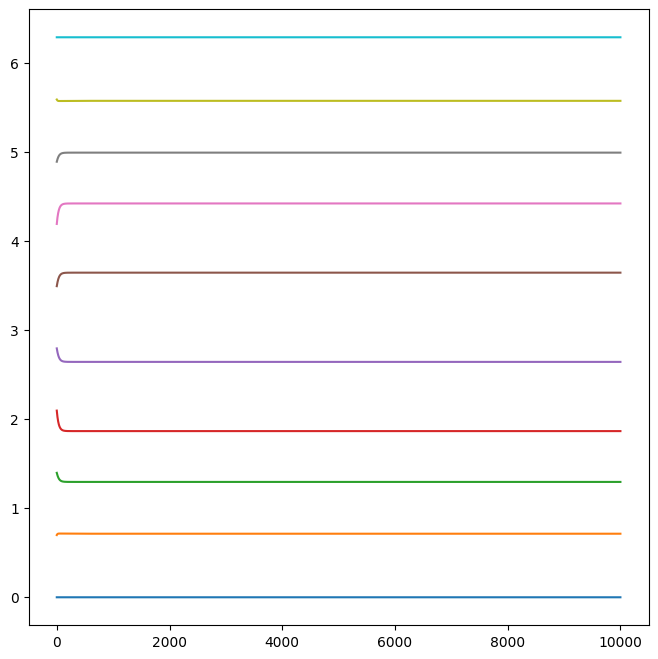

In [31]:
plt.plot(theta_time)

ValueError: x and y must have same first dimension, but have shapes (10000,) and (1,)

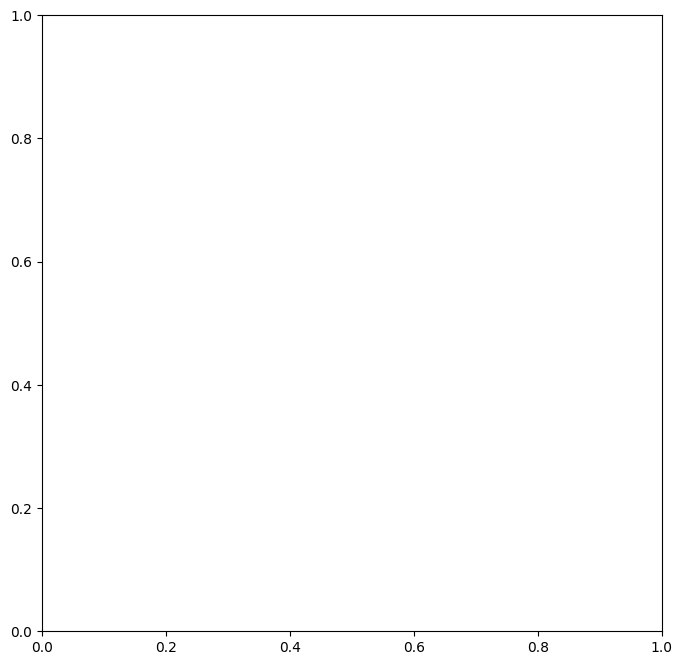

In [566]:
plt.plot(times,r)

In [33]:
len(indexing); np.sum(Bijk,axis=(1,2))

array([72., 72., 72., 72., 72., 72., 72., 72., 72., 72.])

In [567]:
def get_order_parameter(theta):
    ''' get theta and return r and theta'''
    rpsi = np.mean(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    return r,psi

def get_ZE12(Etheta):
    ''' get theta and return r and theta'''
    E1 = Etheta
    E2 = E1**2
    Z1,Z2 = np.mean(E1),np.mean(E2)
    return Z1,Z2




In [570]:
def Kuramoto_SOL_CHIMERA(Theta,t,omega,Bijk,alpha):
    # print("Case m = 0")
    theta = Theta.copy()
    # theta_i,theta_j = np.meshgrid(theta,theta,sparse=False,indexing='ij')
    i,j,k = np.meshgrid(theta,theta,theta,sparse=False,indexing='ij')
    # theta_i,theta_j = np.meshgrid(theta,theta,sparse=True)
    dtheta = omega + np.sum(np.sum(Bijk*np.sin(j+k-2*i-alpha),axis=2),axis=1)
    return dtheta


def Kuramoto_SOL_integral(Theta,t,omega,n,indexing,K2,alpha):
    r2 = np.zeros(n, dtype=complex)
    i_theta = Theta.copy()
    for i,j,k in indexing:
        r2[i] += np.exp(1j*(i_theta[j]+i_theta[k]-alpha))*2
        r2[j] += np.exp(1j*(i_theta[k]+i_theta[i]-alpha))*2
        r2[k] += np.exp(1j*(i_theta[j]+i_theta[i]-alpha))*2
    dtheta = omega + K2*(r2*np.exp(-2j*i_theta)).imag
    return dtheta

def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

In [673]:
K2 =  2
Bijk = adjacency_tensor(H,2)
Bijk_i =  K2/(n)**2 *Bijk
np.min(Bijk_i)
alpha = 0.1

In [571]:
BBB = make_Bijk(n)

In [572]:
np.unique(Bijk == BBB)

array([ True])

In [573]:
t = np.arange(0,200,0.1)

In [574]:
# omega = 0
omega = 0*np.ones(n)

theta = np.linspace(0, 2*np.pi, n)


In [575]:
# sol = RK4(Kuramoto_SOL_integral,theta,t,args=(omega,n,indexing,2/n/n,alpha))
# rabs2 = np.mean(np.exp(2*sol[:,:].T*1j),axis=0)
# rabs1 = np.mean(np.exp(sol[:,:].T*1j),axis=0)

# r2 = np.abs(rabs2)
# r1 = np.abs(rabs1)


In [585]:
N = n
Theta = np.linspace(0,np.pi,N)

In [586]:
theta = Theta.copy()
i,j,k = np.meshgrid(theta,theta,theta,sparse=False,indexing='ij')
dtheta = omega + np.sum(np.sum(Bijk_i*np.sin(j+k-2*i-alpha),axis=2),axis=1) 

In [661]:
theta = Theta.copy()
r,psi = get_order_parameter(theta)
r2,psi2 = get_order_parameter(2*theta)
dthetaMF  = omega + K2*r*r*np.sin(2*(psi-theta)-alpha) -K2*r/N*np.sin((psi-theta)-alpha) - K2*r/N*np.sin((psi-theta)-alpha) - K2*r2/N*np.sin(psi2-2*theta-alpha) -2*K2/N/N*np.sin(alpha)

In [662]:
ET = np.exp(1j*Theta)
Z1,Z2 =  get_ZE12(ET)
A = np.exp(-1j*alpha)
ET = np.conjugate(ET)
# dtheta  = omega + K2*r*r*np.sin(2*(psi-theta)-alpha) -K2*r/N*np.sin((psi-theta)-alpha) - K2*r/N*np.sin((psi-theta)-alpha) - K2*r2/N*np.sin(psi2-2*theta-alpha)
# dtheta_E  = omega + ((((K2*A*(Z1**2-Z2/N))*ET - (2*K2*Z1*A/N)))*ET).imag
dtheta_E  = omega + ((K2*A*(Z1**2-Z2/N))*ET*ET -2*K2*A/N*Z1*ET+2*K2*A/N/N).imag
# dtheta_E  = omega + (((K2*A*(Z1**2-Z2/N))*ET*ET - (2*K2*Z1*A/N))*ET).imag
# dtheta  = omega + K2*((r*r*np.exp(1j*(2*psi-alpha)) - r2/N*np.exp(1j*(psi

In [663]:
2*K2/N/N*np.sin(alpha)

0.003993336665873126

In [664]:

((K2*A*(Z1**2-Z2/N))*ET*ET -2*K2*A/N*Z1*ET) - ((((K2*A*(Z1**2-Z2/N))*ET - (2*K2*Z1*A/N)))*ET)

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -2.77555756e-17+0.00000000e+00j, -8.32667268e-17-5.55111512e-17j,
       -5.55111512e-17+0.00000000e+00j,  0.00000000e+00-2.77555756e-17j,
        5.55111512e-17+5.55111512e-17j,  0.00000000e+00+0.00000000e+00j,
       -1.11022302e-16+2.77555756e-17j,  0.00000000e+00-5.55111512e-17j])

In [665]:
ET**2 == ET*ET

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [666]:
(((K2*A*(Z1**2-Z2/N))*ET - (2*K2*Z1*A/N))*ET)*ET - (((K2*A*(Z1**2-Z2/N))*(ET*ET) - ET*(2*K2*Z1*A/N)))

array([ 0.        +0.j        ,  0.12640345+0.17571753j,
        0.37292837+0.01846275j,  0.29527985-0.37892817j,
       -0.19986691-0.53139746j, -0.66799257-0.10762787j,
       -0.5416327 +0.63163618j,  0.25327388+0.99411054j,
        1.11909911+0.50459729j,  1.27461566-0.58386869j])

In [667]:
(((K2*A*(Z1**2-Z2/N))*(ET*ET) - ET*(2*K2*Z1*A/N))) - (((K2*A*(Z1**2-Z2/N))*(ET*ET) - (2*K2*Z1*A/N)*ET)) 

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j])

In [668]:
r2 = np.zeros(n, dtype=complex)
i_theta = Theta.copy()

for i,j,k in indexing:
    r2[i] += np.exp(1j*(i_theta[j]+i_theta[k]-alpha))*2
    r2[j] += np.exp(1j*(i_theta[k]+i_theta[i]-alpha))*2
    r2[k] += np.exp(1j*(i_theta[j]+i_theta[i]-alpha))*2
dthetaI = omega + K2/N/N*(r2*np.exp(-2j*i_theta)).imag

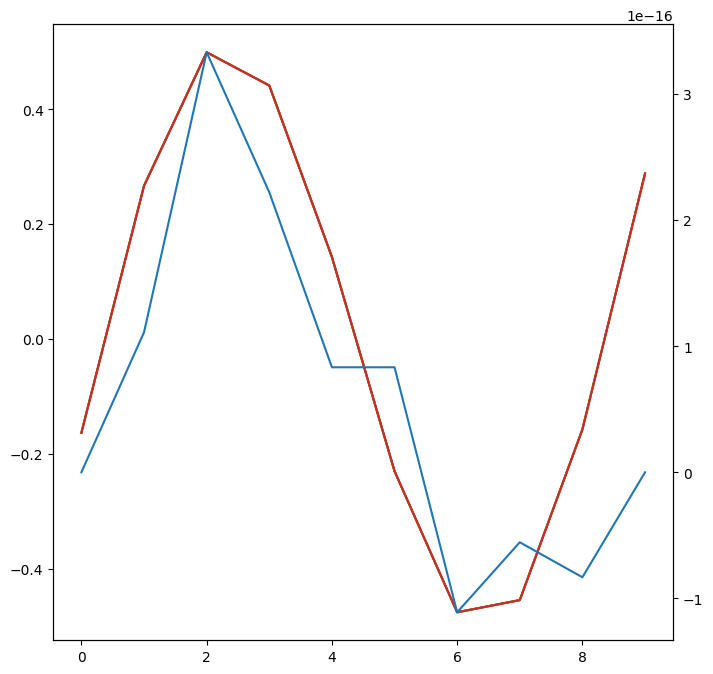

In [669]:
plt.plot(dthetaI)
plt.plot(dthetaMF)
plt.plot(dtheta_E)
plt.plot(dtheta_E)
plt.twinx()
# plt.plot(dtheta-dthetaMF)
# plt.plot(dtheta-dthetaI)
plt.plot(dtheta-dtheta_E)


In [670]:
np.shape(Bijk_i)

(10, 10, 10)

In [671]:
omega = 0

In [672]:
solI = RK4(Kuramoto_SOL_integral,theta,t,args=(omega,n,indexing,K2/n/n,alpha))
rabs2_I = np.mean(np.exp(2*solI[:,:].T*1j),axis=0)
rabs1_I = np.mean(np.exp(solI[:,:].T*1j),axis=0)

# rabs2_ = rabs2__[len(t)//2:]
r2_I = np.abs(rabs2_I)
r1_I = np.abs(rabs1_I)


In [674]:
solS = RK4(Kuramoto_SOL_CHIMERA,theta,t,args=(omega,Bijk_i,alpha))
rabs2_S = np.mean(np.exp(2*solS[:,:].T*1j),axis=0)
rabs1_S = np.mean(np.exp(solS[:,:].T*1j),axis=0)

# rabs2_ = rabs2__[len(t)//2:]
r2_S = np.abs(rabs2_S)
r1_S = np.abs(rabs1_S)


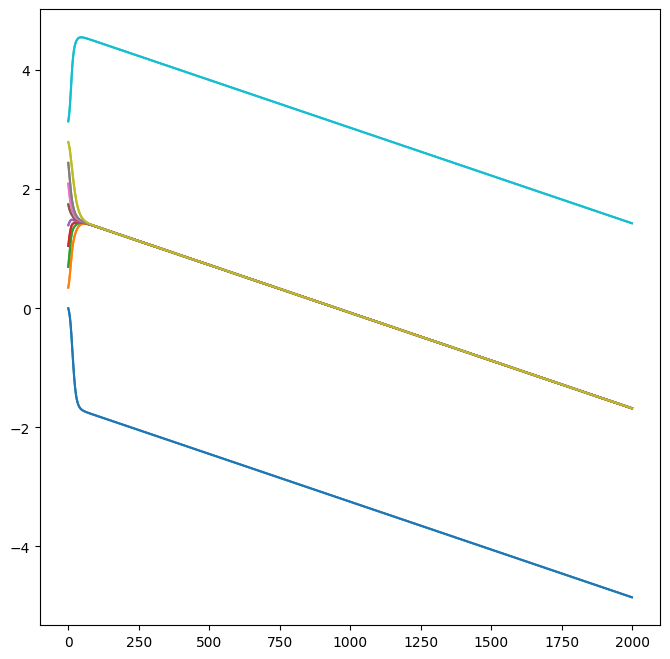

In [676]:
plt.plot(solS)
plt.plot(solI)

In [678]:
def get_order_parameter(theta):
    ''' get theta and return r and theta'''
    rpsi = np.mean(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    return r,psi

def get_ZE12(Etheta):
    ''' get theta and return r and theta'''
    E1 = Etheta
    E2 = E1**2
    Z1,Z2 = np.mean(E1),np.mean(E2)
    return Z1,Z2



def Kuramoto_MF_CHIMERA(Theta,t,N,omega,K2,alpha):
    # print("Case m = 0")
    theta = Theta.copy()
    r,psi = get_order_parameter(theta)
    r2,psi2 = get_order_parameter(2*theta)
    dtheta  = omega + K2*r*r*np.sin(2*(psi-theta)-alpha) -K2*r/N*np.sin((psi-theta)-alpha) - K2*r/N*np.sin((psi-theta)-alpha) - K2*r2/N*np.sin(psi2-2*theta-alpha)
    # dtheta  = omega + K2*((r*r*np.exp(1j*(2*psi-alpha)) - r2/N*np.exp(1j*(psi2-alpha))*np.exp(-1j*theta) - r/N*np.sin((psi-theta)-alpha))*np.exp(-1j*theta)).imag
    return dtheta


def Kuramoto_MF_CHIMERA(Theta,t,N,omega,K2,alpha):
    # print("Case m = 0")
    ET = np.exp(1j*Theta)
    Z1,Z2 =  get_ZE12(ET)
    A = np.exp(-1j*alpha)
    ET = np.conjugate(ET)
    # dtheta  = omega + K2*r*r*np.sin(2*(psi-theta)-alpha) -K2*r/N*np.sin((psi-theta)-alpha) - K2*r/N*np.sin((psi-theta)-alpha) - K2*r2/N*np.sin(psi2-2*theta-alpha)
    dtheta  = omega + (((K2*A*(Z1**2-Z2/N))*ET - (2*K2*Z1*A/N))*ET+2*K2*A/N/N).imag
    # dtheta  = omega + K2*((r*r*np.exp(1j*(2*psi-alpha)) - r2/N*np.exp(1j*(psi2-alpha))*np.exp(-1j*theta) - r/N*np.sin((psi-theta)-alpha))*np.exp(-1j*theta)).imag
    return dtheta

In [679]:
sol_MF = RK4(Kuramoto_MF_CHIMERA,theta,t,args=(n,omega,K2,alpha))
rabs2_MF = np.mean(np.exp(2*sol_MF[:,:].T*1j),axis=0)
rabs1_MF = np.mean(np.exp(sol_MF[:,:].T*1j),axis=0)

# rabs2_ = rabs2__[len(t)//2:]
r2_MF = np.abs(rabs2_MF)
r1_MF = np.abs(rabs1_MF)

In [681]:
def RUN():
    theta = Theta.copy()
    r,psi = get_order_parameter(theta)
    r2,psi2 = get_order_parameter(2*theta)
    dtheta  = omega + K2*r*r*np.sin(2*(psi-theta)-alpha) -K2*r/N*np.sin((psi-theta)-alpha) - K2*r/N*np.sin((psi-theta)-alpha) - K2*r2/N*np.sin(psi2-2*theta-alpha)
%timeit RUN()

19.5 µs ± 220 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [682]:
def RUN():
    ET = np.exp(1j*Theta)
    Z1,Z2 =  get_ZE12(ET)
    A = np.exp(-1j*alpha)
    ET = np.conjugate(ET)
    # dtheta  = omega + K2*r*r*np.sin(2*(psi-theta)-alpha) -K2*r/N*np.sin((psi-theta)-alpha) - K2*r/N*np.sin((psi-theta)-alpha) - K2*r2/N*np.sin(psi2-2*theta-alpha)
    dtheta  = omega + (((K2*A*(Z1**2-Z2/N))*ET - (2*K2*Z1*A/N))*ET+2*K2*A/N/N).imag
%timeit RUN()

10.6 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
(2*np.exp(1j*psi)*np.exp(1j * 5)).imag

In [ ]:
(2*np.sin(psi+5))

In [ ]:
plt.subplot(211)

plt.plot(t,r1_I)
plt.plot(t,r2_I)
plt.plot(t,r1_MF)
plt.plot(t,r2_MF)

plt.plot(t,r1_S)
plt.plot(t,r2_S)


plt.subplot(212)

# plt.plot(t,r1_MF-r1_I)
plt.plot(r2_MF-r2_I)
plt.plot(r2_MF-r2_S)
# plt.yscale('log')
# plt.plot(t,r1_S-r1_I)
# plt.plot(t,r2_S-r2_I)

In [ ]:
plt.scatter(np.sin(2*sol_MF[-1]),np.cos(2*sol_MF[-1]))

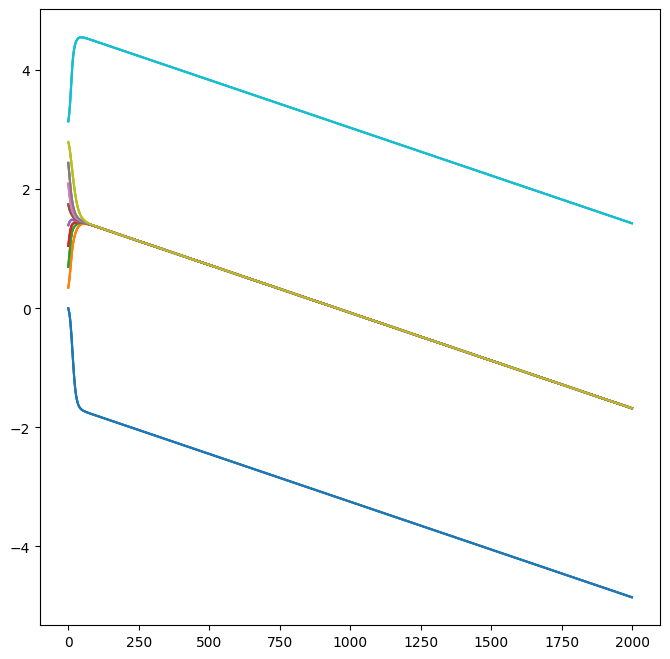

In [684]:
plt.plot(solI)
plt.plot(solS)
plt.plot(sol_MF)

In [ ]:
plt.plot(solI-sol_MF)
plt.xscale('log')
# plt.plot(sol2)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(t,r1_S,ls='--',label = 'Summation')
plt.plot(t,r2_S,ls='--',label = 'Summation')
plt.legend(loc=1)

plt.xlabel('t')
plt.ylabel('$r_1,r_2$')
plt.twiny()
plt.plot(t,r1_MF,label = 'MF')
plt.plot(t,r2_MF,label = 'MF')
plt.legend()

In [ ]:
plt.plot(t,r1_I)
plt.plot(t,r1_S)
plt.plot(t,r1_MF)
# plt.plot(times,r)
plt.plot(t,r2_I)
plt.plot(t,r2_S)
plt.plot(t,r2_MF)

In [ ]:
plt.plot(sol2)
# plt.plot(sol)
plt.plot(sol_MF)

## Sol group interaction

In [483]:
def make_Bijk(N):
    Bijk = np.ones((N,N,N)) - np.eye(N)
    for i in range(N): Bijk[i,i,:]=0;Bijk[i,:,i]=0
    return Bijk

def make_BIJK(K111,K112,K122,SS,Nt):
    Bijk = make_Bijk(Nt)
    B0 = np.where(Bijk==0)
    SS1,SS2 = SS, Nt - SS
    Bijk[:SS,:SS,:SS] = K111/((SS1)*(SS1)) #G111
    Bijk[:SS,:SS,SS:] = K112/((SS1)*(SS2)) #G112
    Bijk[:SS,SS:,:SS] = K112/((SS1)*(SS2)) #G121
    Bijk[:SS,SS:,SS:] = K122/((SS2)*(SS2)) #G122
    Bijk[SS:,SS:,SS:] = K111/((SS2)*(SS2)) #G222
    Bijk[SS:,SS:,:SS] = K112/((SS2)*(SS1)) #G221
    Bijk[SS:,:SS,SS:] = K112/((SS2)*(SS1)) #G212
    Bijk[SS:,:SS,:SS] = K122/((SS1)*(SS1)) #G211
    Bijk[B0] = 0
    return Bijk

In [484]:
def get_order_parameter(theta):
    ''' get theta and return r and theta'''
    rpsi = np.mean(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    return r,psi


# def Kuramoto_MF_CHIMERA(Theta,t,N1,N2,omega,K111,K112,K122,beta):
#     # print("Case m = 0")
#     theta = Theta.copy()
#     theta1,theta2 = theta[:N1],theta[N1:] 
#     r1,psi1 = get_order_parameter(theta1)
#     r2,psi2 = get_order_parameter(theta2)
#     dtheta1  = omega + K111*r1*r1*np.sin(2*(psi1-theta1)-beta) + 2*K112*r1*r2*np.sin(psi1+psi2-2*theta1-beta) + K122*r2*r2*np.sin(2*(psi2-theta1)-beta)
#     dtheta2  = omega + K111*r2*r2*np.sin(2*(psi2-theta2)-beta) + 2*K112*r1*r2*np.sin(psi1+psi2-2*theta2-beta) + K122*r1*r1*np.sin(2*(psi1-theta2)-beta)
#     theta[:N1] = dtheta1
#     theta[N1:] = dtheta2
#     return theta



def Kuramoto_MF_CHIMERA_OLD(Theta,t,N1,N2,omega,K111,K112,K122,alpha):
    # print("Case m = 0")
    theta = Theta.copy()
    theta1,theta2 = theta[:N1],theta[N1:] 
    r11,psi11 = get_order_parameter(theta1)
    r21,psi21 = get_order_parameter(2*theta1)
    r12,psi12 = get_order_parameter(theta2)
    r22,psi22 = get_order_parameter(2*theta2)
    M_111 = (2*K111/N1)*r11*np.sin(psi11-theta1-alpha) + (K111/N1)*r21*np.sin(psi21 -2*theta1-alpha)
    M_112 = (K112/N1*r12)*np.sin(psi12-theta1-alpha)
    M_122 = (K122/N2*r22)*np.sin(psi22 -2*theta1-alpha)

    M_211 = (2*K111/N2*r12)*np.sin(psi12-theta2-alpha) + (K111/N2*r22)*np.sin(psi22 -2*theta2-alpha)
    M_212 = (K112/N2*r11)*np.sin(psi11-theta2-alpha)
    M_222 = (K122/N1*r21)*np.sin(psi21 -2*theta2-alpha)
    theta[:N1] = omega + (K111*r11*r11)*np.sin(2*(psi11-theta1)-alpha) + (2*K112*r11*r12)*np.sin(psi11+psi12-2*theta1-alpha) + (K122*r12*r12)*np.sin(2*(psi12-theta1)-alpha) - M_111 - M_122 -2*M_112 
    theta[N1:] = omega + (K111*r12*r12)*np.sin(2*(psi12-theta2)-alpha) + (2*K112*r11*r12)*np.sin(psi11+psi12-2*theta2-alpha) + (K122*r11*r11)*np.sin(2*(psi11-theta2)-alpha) - M_211 - M_222 -2*M_212 
    return theta


def Kuramoto_MF_CHIMERA(Theta,t,Na,Nb,omega,K111,K112,K122,alpha):
    # print("Case m = 0")
    Etheta = np.exp(1j*Theta)
    dtheta = np.zeros(Na+Nb)
    EA,EB = Etheta[:Na],Etheta[Na:]
    Z1a,Z2a = get_ZE12(EA)
    Z1b,Z2b = get_ZE12(EB)
    A = np.exp(-1j*alpha)
    EA,EB = np.conjugate(EA), np.conjugate(EB)
    # dtheta[:Na] = omega + ((A*(K111*Z1a**2+2*K112*Z1a*Z1b+K122*Z1b**2-K111/Na*Z2a - K122/Nb*Z2b))*EA*EA -(2*A/Na*(K111*Z1a+K112*Z1b))*EA).imag
    # dtheta[Na:] = omega + ((A*(K111*Z1b**2+2*K112*Z1a*Z1b+K122*Z1a**2-K111/Nb*Z2b - K122/Na*Z2a))*EB*EB -(2*A/Nb*(K111*Z1b+K112*Z1a))*EB).imag
    dtheta[:Na] = omega + ((A*(K111*Z1a**2+2*K112*Z1a*Z1b+K122*Z1b**2-K111/Na*Z2a - K122/Nb*Z2b))*EA*EA -(2*A/Na*(K111*Z1a+K112*Z1b))*EA).imag
    dtheta[Na:] = omega + ((A*(K111*Z1b**2+2*K112*Z1a*Z1b+K122*Z1a**2-K111/Nb*Z2b - K122/Na*Z2a))*EB*EB -(2*A/Nb*(K111*Z1b+K112*Z1a))*EB).imag
    return dtheta

In [174]:
Na = SS
Nb = SS

Etheta = np.exp(1j*Theta)
EA,EB = Etheta[:Na],Etheta[Na:]
Z1a,Z2a = get_Z12(EA)
Z1b,Z2b = get_Z12(EB)
A = np.exp(-1j*alpha)
EA,EB = np.conjugate(EA), np.conjugate(EB)
Theta[:Na] = omega + ((A*(K111*Z1a**2+2*K112*Z1a*Z1b+K122*Z1b**2-K111/Na*Z2a - K122/Nb*Z2b))*EA*EA -(2*A/Na*(K111*Z1a+K112*Z1b))*EA).imag
Theta[Na:] = omega + ((A*(K111*Z1b**2+2*K112*Z1a*Z1b+K122*Z1a**2-K111/Nb*Z2b - K122/Na*Z2a))*EB*EB -(2*A/Nb*(K111*Z1b+K112*Z1a))*EB).imag

In [485]:
N = 10
Nt = N*2
omega =  0
alpha = 0.2

nu = 0.7
mu = 0.1*nu
xi = 1 - mu - nu
SS = N 
Bijk = make_BIJK(K111=nu,K112=mu,K122=xi,SS =SS,Nt = 2*N)
# Bijk2 = make_BIJK2(nu=nu,mu=mu,xi=xi,SS =SS,Nt = 2*N)
K111,K112,K122 = nu,mu,xi
Theta = np.random.uniform(0,2*np.pi,Nt)

In [486]:
t = np.arange(0,300,0.05)
sol = RK4(Kuramoto_SOL_CHIMERA,Theta,t,args=(omega,Bijk,alpha))
rabs2_1 = np.mean(np.exp(2*sol[:,:SS].T*1j),axis=0)
rabs2_2 = np.mean(np.exp(2*sol[:,SS:].T*1j),axis=0)
rabs1_1 = np.mean(np.exp(sol[:,:SS].T*1j),axis=0)
rabs1_2 = np.mean(np.exp(sol[:,SS:].T*1j),axis=0)

# rabs2_ = rabs2__[len(t)//2:]
r2_1 = np.abs(rabs2_1)
r2_2 = np.abs(rabs2_2)

r1_1 = np.abs(rabs1_1)
r1_2 = np.abs(rabs1_2)

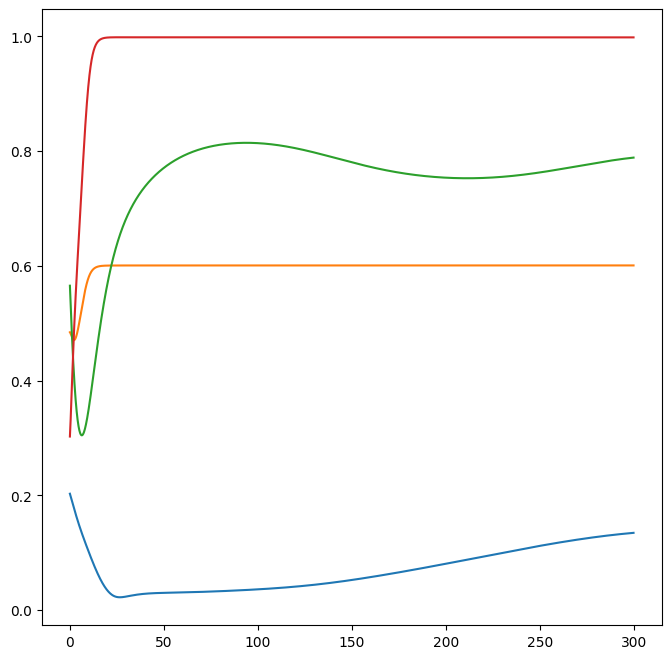

In [487]:
plt.plot(t,r1_1)
plt.plot(t,r1_2)
plt.plot(t,r2_1)
plt.plot(t,r2_2)

In [488]:
Nt

20

In [489]:
K111 = 1
K112 = 0.6
K122 = 0.2
alpha = 0.1
Theta = np.random.uniform(0,2*np.pi,Nt)

10 10


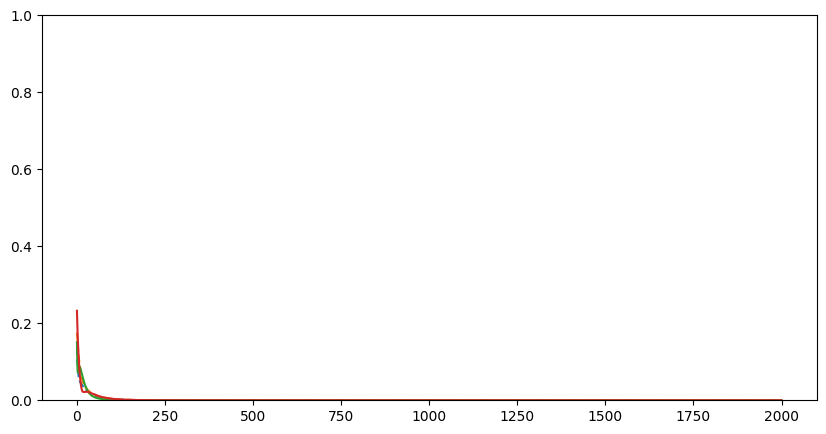

In [490]:
t1 = np.arange(0,2000,0.05)
# t1 = t*10
N1 = SS
N2 = Nt - SS
print(N1,N2)

sol_MF = RK4(Kuramoto_MF_CHIMERA,Theta,t1,args=(N1,N2,omega,K111,K112,K122,alpha))
rabs2_1_MF = np.mean(np.exp(2*sol_MF[:,:SS].T*1j),axis=0)
rabs2_2_MF = np.mean(np.exp(2*sol_MF[:,SS:].T*1j),axis=0)
rabs1_1_MF = np.mean(np.exp(sol_MF[:,:SS].T*1j),axis=0)
rabs1_2_MF = np.mean(np.exp(sol_MF[:,SS:].T*1j),axis=0)

# rabs2_ = rabs2__[len(t)//2:]
r2_1_MF = np.abs(rabs2_1_MF)
r2_2_MF = np.abs(rabs2_2_MF)
r1_1_MF = np.abs(rabs1_1_MF)
r1_2_MF = np.abs(rabs1_2_MF)
plt.figure(figsize=(10,5))
plt.plot(t1,r1_1_MF,ls ='--')
plt.plot(t1,r1_2_MF,ls ='--')
plt.plot(t1,r2_1_MF)
plt.plot(t1,r2_2_MF)
plt.ylim(0,1)
plt.show()

In [310]:
t2 = np.arange(0,300,0.05)

# t1 = t*10
N1 = SS
N2 = Nt - SS
print(N1,N2)

sol_MF_OLD = RK4(Kuramoto_MF_CHIMERA_OLD,Theta,t2,args=(N1,N2,omega,K111,K112,K122,alpha))
rabs2_1_MF_OLD = np.mean(np.exp(2*sol_MF_OLD[:,:SS].T*1j),axis=0)
rabs2_2_MF_OLD = np.mean(np.exp(2*sol_MF_OLD[:,SS:].T*1j),axis=0)
rabs1_1_MF_OLD = np.mean(np.exp(sol_MF_OLD[:,:SS].T*1j),axis=0)
rabs1_2_MF_OLD = np.mean(np.exp(sol_MF_OLD[:,SS:].T*1j),axis=0)

# rabs2_ = rabs2__[len(t)//2:]
r2_1_MF_OLD = np.abs(rabs2_1_MF_OLD)
r2_2_MF_OLD = np.abs(rabs2_2_MF_OLD)
r1_1_MF_OLD = np.abs(rabs1_1_MF_OLD)
r1_2_MF_OLD = np.abs(rabs1_2_MF_OLD)


100 100


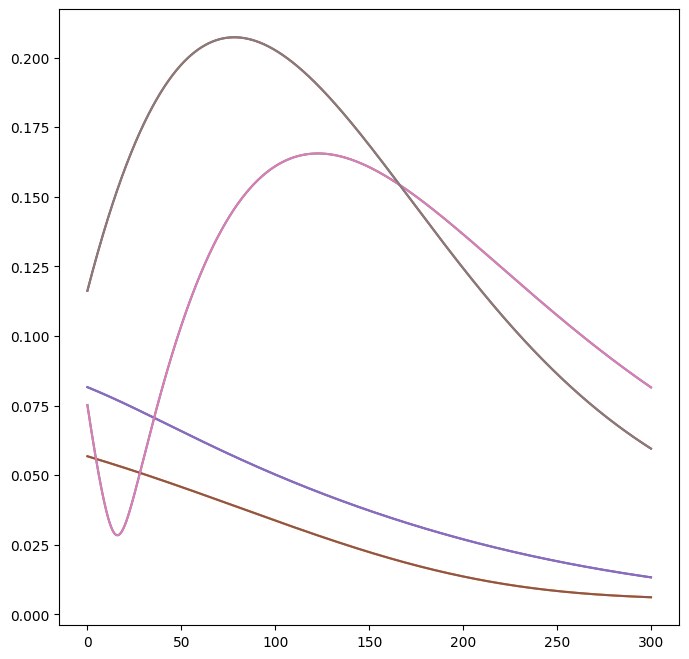

In [311]:
plt.plot(t1,r1_1_MF)
plt.plot(t1,r1_2_MF)
plt.plot(t1,r2_1_MF)
plt.plot(t1,r2_2_MF)

plt.plot(t2,r1_1_MF_OLD)
plt.plot(t2,r1_2_MF_OLD)
plt.plot(t2,r2_1_MF_OLD)
plt.plot(t2,r2_2_MF_OLD)


# plt.plot(t1,r1_1_MF_OLD)
# plt.plot(t1,r1_2_MF_OLD)
# plt.plot(t1,r2_1_MF_OLD)
# plt.plot(t1,r2_2_MF_OLD)

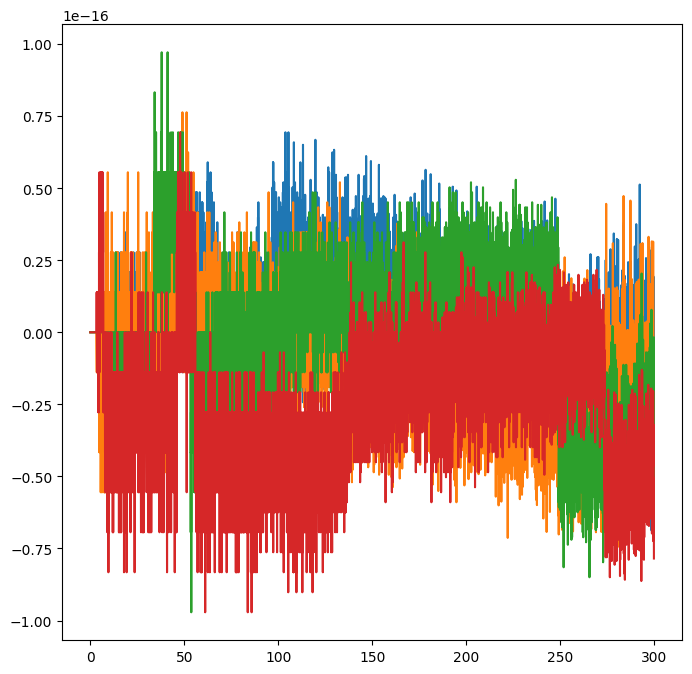

In [291]:
plt.plot(t1,r1_1_MF-r1_1_MF_OLD)
plt.plot(t1,r1_2_MF-r1_2_MF_OLD)
plt.plot(t1,r2_1_MF-r2_1_MF_OLD)
plt.plot(t1,r2_2_MF-r2_2_MF_OLD)

In [267]:
import matplotlib.pyplot as plt

In [145]:
sol.shape

(6000, 60)

In [ ]:
plt.plot(t,sol[:,:SS])
plt.plot(t1,sol_MF[:,:SS])

In [ ]:
plt.plot(np.mean(sol_MF[:,SS:]-sol[:,SS:],axis=1))              

In [ ]:
# plt.plot(t,sol[:,SS:])
# plt.plot(t1,sol_MF[:,SS:])
plt.twinx()
plt.plot(t1,sol_MF[:,SS:]-sol[:,SS:])

In [191]:
Theta = np.linspace(0,np.pi,2*N)

In [237]:
def RUN():
    theta = Theta.copy()
    SS1,SS2 = N , N
    theta1,theta2 = theta[:SS1],theta[SS1:] 
    r11,psi11 = get_order_parameter(theta1)
    r21,psi21 = get_order_parameter(2*theta1)
    r12,psi12 = get_order_parameter(theta2)
    r22,psi22 = get_order_parameter(2*theta2)
    M_111_1 = (2*K111/SS1)*r11*np.sin(psi11-theta1-alpha) 
    M_111_2 = (K111/SS1)*r21*np.sin(psi21 -2*theta1-alpha)
    M_112_1 = (K112/SS1*r12)*np.sin(psi12-theta1-alpha)
    M_122_2 = (K122/SS2*r22)*np.sin(psi22 -2*theta1-alpha)

    M_211_1 = (2*K111/SS2*r12)*np.sin(psi12-theta2-alpha)
    M_211_2 =  (K111/SS2*r22)*np.sin(psi22 -2*theta2-alpha)
    M_212_1 = (K112/SS2*r11)*np.sin(psi11-theta2-alpha)
    M_222_2 = (K122/SS1*r21)*np.sin(psi21 -2*theta2-alpha)
    dtheta1  = omega + (K111*r11*r11)*np.sin(2*(psi11-theta1)-alpha) + (2*K112*r11*r12)*np.sin(psi11+psi12-2*theta1-alpha) + (K122*r12*r12)*np.sin(2*(psi12-theta1)-alpha)  - M_111_2  - M_122_2 - M_111_1 -2*M_112_1
    dtheta2  = omega + (K111*r12*r12)*np.sin(2*(psi12-theta2)-alpha) + (2*K112*r11*r12)*np.sin(psi11+psi12-2*theta2-alpha) + (K122*r11*r11)*np.sin(2*(psi11-theta2)-alpha)  - M_211_2  - M_222_2 - M_211_1 -2*M_212_1
    dtheta_MF = np.r_[dtheta1,dtheta2]

%timeit RUN()

62.6 µs ± 219 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [236]:
def RUN():
    Etheta = np.exp(1j*Theta)
    dtheta_NEW = np.zeros(Na+Nb)
    EA,EB = Etheta[:Na],Etheta[Na:]
    Z1a,Z2a = get_ZE12(EA)
    Z1b,Z2b = get_ZE12(EB)
    A = np.exp(-1j*alpha)
    EA,EB = np.conjugate(EA), np.conjugate(EB)
    dtheta_NEW[:Na] = omega + ((A*(K111*Z1a**2+2*K112*Z1a*Z1b+K122*Z1b**2-K111/Na*Z2a - K122/Nb*Z2b))*EA*EA -(2*A/Na*(K111*Z1a+K112*Z1b))*EA).imag
    dtheta_NEW[Na:] = omega + ((A*(K111*Z1b**2+2*K112*Z1a*Z1b+K122*Z1a**2-K111/Nb*Z2b - K122/Na*Z2a))*EB*EB -(2*A/Nb*(K111*Z1b+K112*Z1a))*EB).imag
%timeit RUN()

# dtheta_NEW1 = omega + (((A*(K111*Z1a**2+2*K112*Z1a*Z1b+K122*Z1b**2-K111/Na*Z2a - K122/Nb*Z2b)))*EA*EA).imag -(2*A/Na*(K111*Z1a+K112*Z1b))*EA).imag
# dtheta_NEW2 = omega + (((A*(K111*Z1b**2+2*K112*Z1a*Z1b+K122*Z1a**2-K111/Nb*Z2b - K122/Na*Z2a)))*EB*EB).imag -(2*A/Nb*(K111*Z1b+K112*Z1a))*EB).imag


17.4 µs ± 187 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [233]:
-((2*A/Na*(K111*Z1a+K112*Z1b))*EA).imag

array([-0.02612397, -0.02433912, -0.02248528, -0.0205677 , -0.01859182,
       -0.01656324, -0.01448771, -0.01237111, -0.01021944, -0.00803881,
       -0.00583539, -0.00361543, -0.00138522,  0.00084892,  0.00308065,
        0.00530364,  0.00751161,  0.00969828,  0.01185746,  0.01398303,
        0.01606896,  0.01810934,  0.02009839,  0.02203047,  0.0239001 ,
        0.02570199,  0.02743102,  0.02908229,  0.03065113,  0.03213308])

In [234]:
- M_111_1 -2*M_112_1

array([-0.02612397, -0.02433912, -0.02248528, -0.0205677 , -0.01859182,
       -0.01656324, -0.01448771, -0.01237111, -0.01021944, -0.00803881,
       -0.00583539, -0.00361543, -0.00138522,  0.00084892,  0.00308065,
        0.00530364,  0.00751161,  0.00969828,  0.01185746,  0.01398303,
        0.01606896,  0.01810934,  0.02009839,  0.02203047,  0.0239001 ,
        0.02570199,  0.02743102,  0.02908229,  0.03065113,  0.03213308])

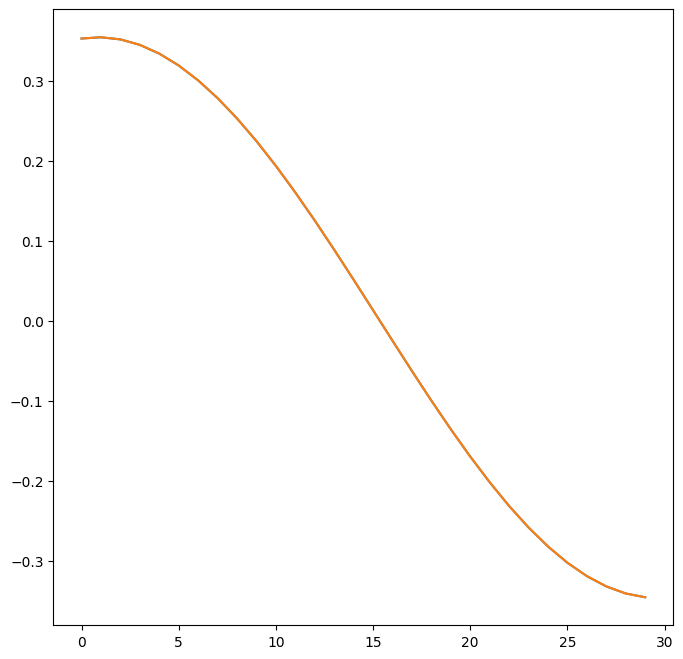

In [235]:
plt.plot(dtheta1)
plt.plot(dtheta_NEW1)

In [581]:
(1 + 1j)**2

2j

In [582]:
(1 + 1j)*(1+1j)

2j

In [467]:
ET = np.exp(1j*Theta)
Z1,Z2 =  get_ZE12(ET)
A = np.exp(-1j*alpha)
ET = np.conjugate(ET)
# dtheta  = omega + K2*r*r*np.sin(2*(psi-theta)-alpha) -K2*r/N*np.sin((psi-theta)-alpha) - K2*r/N*np.sin((psi-theta)-alpha) - K2*r2/N*np.sin(psi2-2*theta-alpha)
# dtheta  = omega + (((K2*A*(Z1**2-Z2/N))*ET - (2*K2*Z1*A/N))*ET).imag
dtheta  = omega + (((K2*A*(Z1**2-Z2/N))*ET*ET - (2*K2*Z1*A/N))*ET).imag

In [463]:
theta = Theta.copy()

i,j,k = np.meshgrid(theta,theta,theta,sparse=False,indexing='ij')
dtheta = omega + np.sum(np.sum(Bijk*np.sin(j+k-2*i-alpha),axis=2),axis=1)

ValueError: operands could not be broadcast together with shapes (60,60,60) (200,200,200) 

In [466]:
A.imag

-0.09983341664682815

ValueError: operands could not be broadcast together with shapes (60,) (200,) 

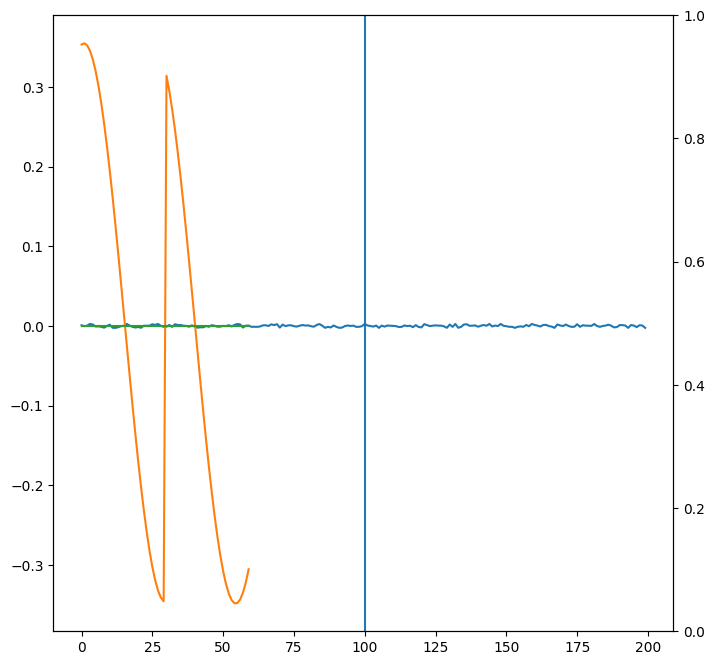

In [464]:
# plt.plot(Theta)
plt.plot(dtheta)
plt.plot(dtheta_MF)
plt.plot(dtheta_NEW)
plt.axvline(SS)
plt.twinx()
plt.plot(dtheta_MF-dtheta,color='green')
# plt.axvline(SS-1)

In [ ]:
AAA = np.zeros((4,4,4))

In [ ]:
SA = 2
AAA[:SA,:SA,:SA] = 5 # 111
AAA[:SA,:SA,SA:] = 3 # 121
AAA[:SA,SA:,:SA] = 2 # 121
AAA[:SA,SA:,SA:] = 1 # 122


AAA[SA:,SA:,SA:] = 0
AAA[SA:,SA:,:SA] = 0
AAA[SA:,:SA,SA:] = 0
AAA[SA:,:SA,:SA] = 0

BB =  np.array([2,2,0,0])
# AAA[:SA,SA:,:SA] = 3
# AAA[:SA,SA:,:SA] = 2
# AAA[:SA,SA:,SA:] = 1

In [ ]:
BB*AAA

In [ ]:
np.sum(np.sum(AAA*BB,axis=2),axis=1)

In [ ]:

i = np.rand.random(0,2*pi,30)

## Re newer

# 아이디어
2. Aij 를 2개를 사용한다.  
- 문제 그룹 내에서 2번 선택되는 경우를 어떻게 해결해야 할지?
- 11,12,13,21,22,23 -> 1 : 서로 겹치지 않는 부분을 Aij를 사용해서 먼저 계산을 하고 나머지는 삼각함수 공식을 이용해서 계산해야 할 듯  
- 
내부에 있는 친구들과 상호작용하는 경우 연결안된 얘들과 빼주는 역활이 있어야 할 것 같다. 그룹 내부의 상호작용 주의
그룹 2와 상호작용하는 경우 일반적인 Aij 를 사용해서 할 수 있을 것 같다, 어차피 2가지의 경우를 모두 고려하는 것이기 때문에 

1. 그룹 Bijk 를 사용하는 경우, 어떤 부분이 sum을 2번해지는지를 확인해 보아야 할듯



In [ ]:
Theta = np.linspace(0,np.pi,2*N)

In [ ]:
theta = Theta.copy()
theta1,theta2 = theta[:N],theta[N:] 
r1,psi1 = get_order_parameter(theta1)
r2,psi2 = get_order_parameter(theta2)
dtheta1  = omega + K111*r1*r1*np.sin(2*(psi1-theta1)-alpha) + 2*K112*r1*r2*np.sin(psi1+psi2-2*theta1-alpha) + K122*r2*r2*np.sin(2*(psi2-theta1)-alpha)
dtheta2  = omega + K111*r2*r2*np.sin(2*(psi2-theta2)-alpha) + 2*K112*r1*r2*np.sin(psi1+psi2-2*theta2-alpha) + K122*r1*r1*np.sin(2*(psi1-theta2)-alpha)
dtheta_MF = np.r_[dtheta1,dtheta2]

In [ ]:
sample = [1,1,1,2,2,2]
i,j,k = np.meshgrid(sample,sample,sample,indexing='xy')
BBBB = make_BIJK(1,2,3,3,6)
np.sum(np.sum(BBBB*(j+k-2*i),axis=1),axis=1)

In [ ]:
def make_Bijk(N):
    Bijk = np.ones((N,N,N)) - np.eye(N)
    for i in range(N): Bijk[i,i,:]=0;Bijk[i,:,i]=0
    return Bijk

def make_BIJK(K111,K112,K122,SS,Nt):
    Bijk = make_Bijk(Nt)
    B0 = np.where(Bijk==0)
    SS1,SS2 = SS, Nt - SS
    Bijk[:SS,:SS,:SS] = K111#/((SS1)*(SS1)) #G111
    Bijk[:SS,:SS,SS:] = K112#/((SS1)*(SS2)) #G112
    Bijk[:SS,SS:,:SS] = K112#/((SS1)*(SS2)) #G121
    Bijk[:SS,SS:,SS:] = K122#/((SS2)*(SS2)) #G122
    Bijk[SS:,SS:,SS:] = K111#/((SS2)*(SS2)) #G222
    Bijk[SS:,SS:,:SS] = K112#/((SS2)*(SS1)) #G221
    Bijk[SS:,:SS,SS:] = K112#/((SS2)*(SS1)) #G212
    Bijk[SS:,:SS,:SS] = K122#/((SS1)*(SS1)) #G211
    Bijk[B0] = 0
    return Bijk

In [ ]:
sample = [1,2,3,2,4,5]
i,j,k = np.meshgrid(sample[:],sample,sample,indexing='ij')
BBBB = make_BIJK(1,2,3,3,6)

np.sum(np.sum(BBBB[:,:,:]*(j+k-2*i),axis=2),axis=1)

In [ ]:
np.sum((BBBB[:,:,:]*(j+k-2*i))[5])

In [ ]:
np.sum(k,axis=2)[:,:]

In [ ]:
np.sum(BBBB[:,:,:]*(j+k-2*i),axis=1)

In [ ]:
np.triu(BBBB[:,:,:])[:3]


In [ ]:
np.triu(BBBB[:3,:,:])

In [ ]:
BBBB[:3,:,:][0]

In [ ]:
plt.imshow(BBBB[0],origin='lower')

In [ ]:
BBBB[0,4,2]

In [ ]:
(BBBB[:,:,:].T*(j+k-2*i))[0,3+1,2]

In [ ]:
make_Bijk(3)[0][1]

In [ ]:
x,y,z= np.meshgrid([1,1,1],[2,2],[3],indexing='ij')
np.shape(x)

In [ ]:
plt.imshow((j+k-2*i)[0])

In [ ]:
BBBB[:3]

In [ ]:
theta = Theta.copy()
i,j,k = np.meshgrid(theta,theta,theta,sparse=False,indexing='ij')
# dtheta = omega + np.sum(np.sum(Bijk*np.sin(j+k-2*i-beta),axis=2),axis=1)

In [ ]:
# plt.plot(Theta)
plt.plot(dtheta)
plt.plot(dtheta_MF)
# plt.plot(dtheta_MF-dtheta)
plt.axvline(SS)
# plt.axvline(SS-1)

# Drawing 

# 그려야 할것들
1. Aij
2. Bijk


In [505]:
import numpy as np
import matplotlib.pyplot as plt    
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

[Text(1, 0.25, 'Disconnected'), Text(1, 0.75, 'Connected')]

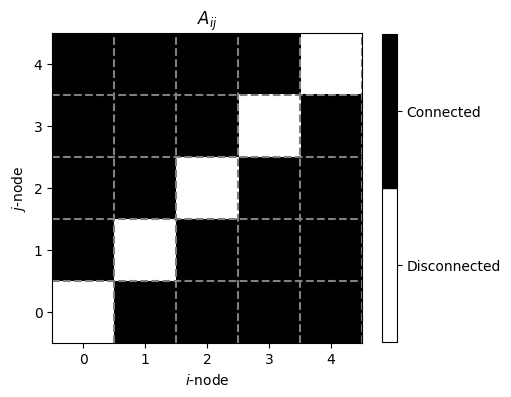

In [548]:
Aij = np.ones(5) - np.eye(5)

plt.figure(figsize=(5,5))
plt.imshow(Aij,origin='lower',cmap='gray_r')
for i in range(5):
    plt.axhline(i+0.5,color='gray',ls='--')
    plt.axvline(i+0.5,color='gray',ls='--')


plt.xlabel(r'$i$-node')
plt.ylabel(r'$j$-node')
plt.title(r'$A_{ij}$')
cbar = plt.colorbar(shrink=0.8)
cbar.ax.clear()
cbar.ax.fill_between([0,1],[0,0],[0.5,0.5],color='#FFFFFF')
cbar.ax.fill_between([0,1],[0.5,0.5],[1,1],color='#000000')
cbar.ax.set_xlim(0,1)
cbar.ax.set_ylim(0,1)
cbar.ax.set_xticks([])
cbar.ax.set_yticks([0.25,0.75])
cbar.ax.set_yticklabels(['Disconnected','Connected'])
# plt.fill_between/

[Text(1, 0.25, 'Disconnected'), Text(1, 0.75, 'Connected')]

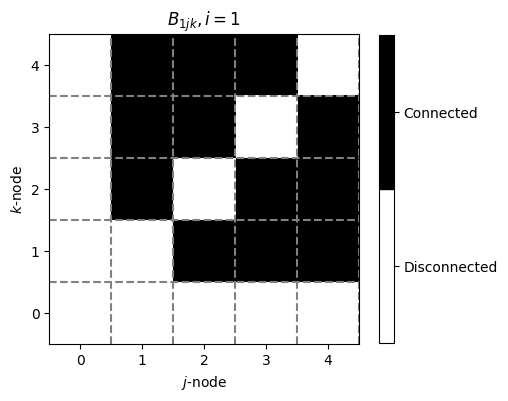

In [551]:
B1jk = np.ones(5) - np.eye(5) 
B1jk[0,:] =  0
B1jk[:,0] =  0

plt.figure(figsize=(5,5))
plt.imshow(B1jk,origin='lower',cmap='gray_r')
for i in range(5):
    plt.axhline(i+0.5,color='gray',ls='--')
    plt.axvline(i+0.5,color='gray',ls='--')


plt.xlabel(r'$j$-node')
plt.ylabel(r'$k$-node')
plt.title(r'$B_{1jk},i=1$')
cbar = plt.colorbar(shrink=0.8)
cbar.ax.clear()
cbar.ax.fill_between([0,1],[0,0],[0.5,0.5],color='#FFFFFF')
cbar.ax.fill_between([0,1],[0.5,0.5],[1,1],color='#000000')
cbar.ax.set_xlim(0,1)
cbar.ax.set_ylim(0,1)
cbar.ax.set_xticks([])
cbar.ax.set_yticks([0.25,0.75])
cbar.ax.set_yticklabels(['Disconnected','Connected'])
# plt.fill_between/